# Analysis and Optimization of Marketing at Y.Afisha

## **Introduction**

This project focuses on analyzing data from the Y.Afisha website with the goal of optimizing marketing expenses.

The company Y.Afisha has provided server logs, order records, and marketing expense statistics covering the period from January 2017 to December 2018.

## **Project Objectives**

**Understanding User Behavior**:

- Analyze how customers use the service, including the number of people using it daily, weekly, and monthly.

- Determine how often users return to the site and the duration of their sessions.

**Evaluating Sales Performance**:


- Identify when users start making purchases and how many orders they place over a given period.

- Calculate the average purchase size and customer lifetime value (LTV).

**Optimizing Marketing Expenses**:

- Analyze how much money has been spent on marketing, both overall and by acquisition source.

- Calculate the customer acquisition cost (CAC) for each advertising source.

- Evaluate the return on marketing investment (ROMI).

## **Loading Data**

In [1]:
# Load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Import the CSV files
visits_log_us = pd.read_csv('/datasets/visits_log_us.csv')

orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')

costs_us = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Find the exact size of the data by adding the memory_usage='deep' parameter to the .info() method.
visits_log_us.info(memory_usage='deep')

visits_log_us.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


# Data Description

This dataset contains 359,400 records and 5 columns:
- **Device**: Type of device used (e.g., 'touch', 'desktop').
- **End Ts**: Session end date and time.
- **Source Id**: Advertising source identifier.
- **Start Ts**: Session start date and time.
- **Uid**: Unique user identifier.

All records are complete, with no missing values. The initial data types include `object` for dates and `int64` for identifiers.


In [7]:
# Find the exact size of the data by adding the memory_usage='deep' parameter to the .info() method.
orders_log_us.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


# Data Description

This dataset contains information about the orders made on the website during the same period. The details of the columns are:
- **Buy Ts**: Order date and time.
- **Revenue**: Revenue generated by the order.
- **Uid**: Unique user identifier.

The dataset contains 50,415 records with no missing values.


In [5]:
# Find the exact size of the data by adding the memory_usage='deep' parameter to the .info() method.
costs_us.info(memory_usage='deep')

costs_us.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# Data Description

This dataset contains 2,542 records and 3 columns:
- **source_id**: Identifier for the advertising source.
- **dt**: Date.
- **costs**: Costs associated with the advertising source on that date.

All records are complete, with no missing values. The data types include `object` for dates and `float64` for costs.

## **Data Preparation**

In [6]:
# Convert the column from object to category as it uses less space.
visits_log_us['Device'] = visits_log_us['Device'].astype('category')

# Convert date columns to datetime
visits_log_us['Start Ts'] =  pd.to_datetime(visits_log_us['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits_log_us['End Ts'] =  pd.to_datetime(visits_log_us['End Ts'], format="%Y-%m-%d %H:%M:%S")

# Display changes
visits_log_us.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [8]:
# Convert the date column to datetime
orders_log_us['Buy Ts'] =  pd.to_datetime(orders_log_us['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

# Verify data types after conversion
print(orders_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [9]:
# Convert the date column to datetime
costs_us['dt'] =  pd.to_datetime(costs_us['dt'], format="%Y-%m-%d %H:%M:%S")

# Verify data types after conversion
print(costs_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [10]:
# Check for duplicate data
print(visits_log_us.duplicated().sum())
print(orders_log_us.duplicated().sum())
print(costs_us.duplicated().sum())

0
0
0


# Changes Made to the Datasets

**visits_log_us:**
- Converted the `Device` column from `object` type to `category` to save memory space.
- Converted the date columns (`Start Ts` and `End Ts`) from `object` to `datetime64[ns]` to facilitate temporal analysis.

**orders_log_us:**
- Converted the date column `Buy Ts` from `object` to `datetime64[ns]` to improve temporal manipulation.

**costs_us:**
- Converted the date column `dt` from `object` to `datetime64[ns]` to ensure consistency in temporal analysis.

**Duplicate Check:**
- No duplicate records were found in any of the datasets.

### Conclusion

The data has been optimized and appropriately converted to ensure efficient and accurate analysis. These changes allow for better manipulation and analysis of temporal variables, as well as reducing memory usage.


## **Visits**

### How many people use it each day, week, and month?

In [11]:
# Extract the year from 'Start Ts'
visits_log_us['session_year']  = visits_log_us['Start Ts'].dt.year

# Extract the month from 'Start Ts'
visits_log_us['session_month']  = visits_log_us['Start Ts'].dt.month

# Extract the week of the year from 'Start Ts'
visits_log_us['session_week']  = visits_log_us['Start Ts'].dt.week

# Extract the date (day) from 'Start Ts'
visits_log_us['session_date'] = visits_log_us['Start Ts'].dt.date

visits_log_us.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [12]:
# Convert the date column to datetime
visits_log_us['session_date'] = pd.to_datetime(visits_log_us['session_date'], format="%Y-%m-%d %H:%M:%S")

# Verify data types after conversion
print(visits_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Device         359400 non-null  category      
 1   End Ts         359400 non-null  datetime64[ns]
 2   Source Id      359400 non-null  int64         
 3   Start Ts       359400 non-null  datetime64[ns]
 4   Uid            359400 non-null  uint64        
 5   session_year   359400 non-null  int64         
 6   session_month  359400 non-null  int64         
 7   session_week   359400 non-null  int64         
 8   session_date   359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](3), int64(4), uint64(1)
memory usage: 22.3 MB
None


In [13]:
# Calculate MAU (Monthly Active Users)
mau_total = (
    visits_log_us.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)

# Calculate DAU (Daily Active Users)
dau_total = visits_log_us.groupby('session_date').agg({'Uid': 'nunique'}).mean()

# Calculate WAU (Weekly Active Users)
wau_total = (
    visits_log_us.groupby(['session_year', 'session_week'])
    .agg({'Uid': 'nunique'})
    .mean()
)

print(int(mau_total))
print(int(dau_total))
print(int(wau_total))

23228
907
5716


In [14]:
# Calculate Sticky Factor (DAU/WAU and DAU/MAU)
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)

sticky_mau = dau_total / mau_total * 100
print(sticky_mau)

Uid    15.884409
dtype: float64
Uid    3.90897
dtype: float64


# Findings
**Interpretation of Results**

- **DAU**: On average, 907 unique users use the service each day.
- **WAU**: On average, 5,716 unique users use the service each week.
- **MAU**: On average, 23,228 unique users use the service each month.
- **Sticky Factor (DAU/WAU)**: Indicates that approximately 15.88% of users who are active weekly are also active daily. This suggests good weekly loyalty.
- **Sticky Factor (DAU/MAU)**: Indicates that approximately 3.91% of users who are active monthly are also active daily. This suggests greater variability in usage frequency among monthly users.


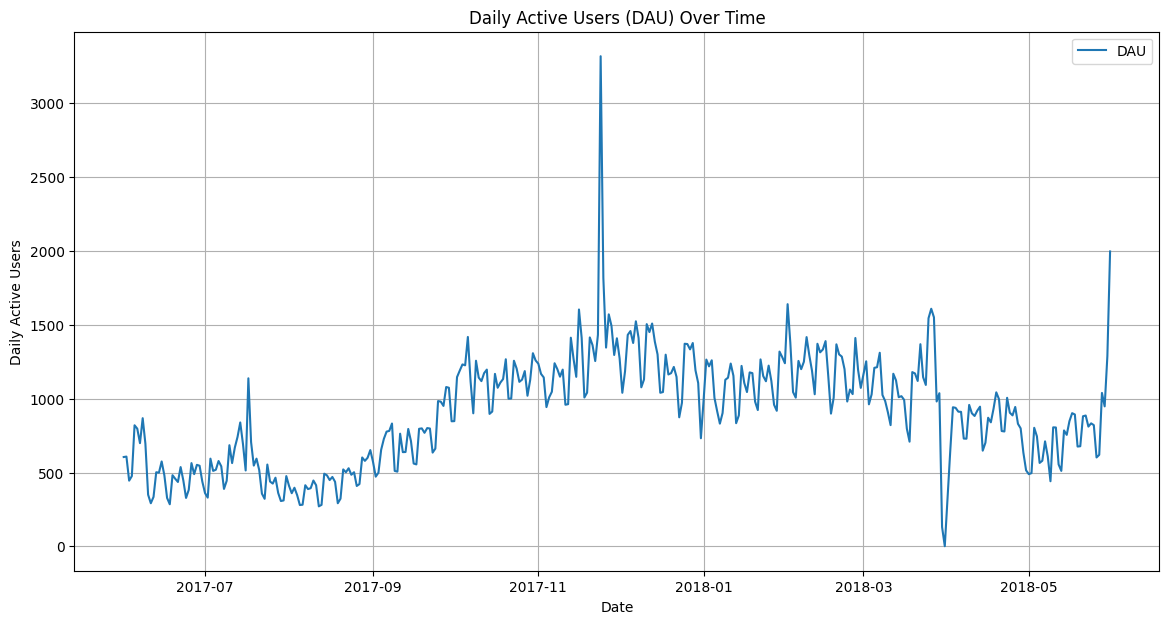

In [15]:
# Calculate DAU Over Time
dau_by_date = visits_log_us.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(dau_by_date['session_date'], dau_by_date['Uid'], label='DAU')
plt.title('Daily Active Users (DAU) Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')
plt.legend()
plt.grid(True)
plt.show()

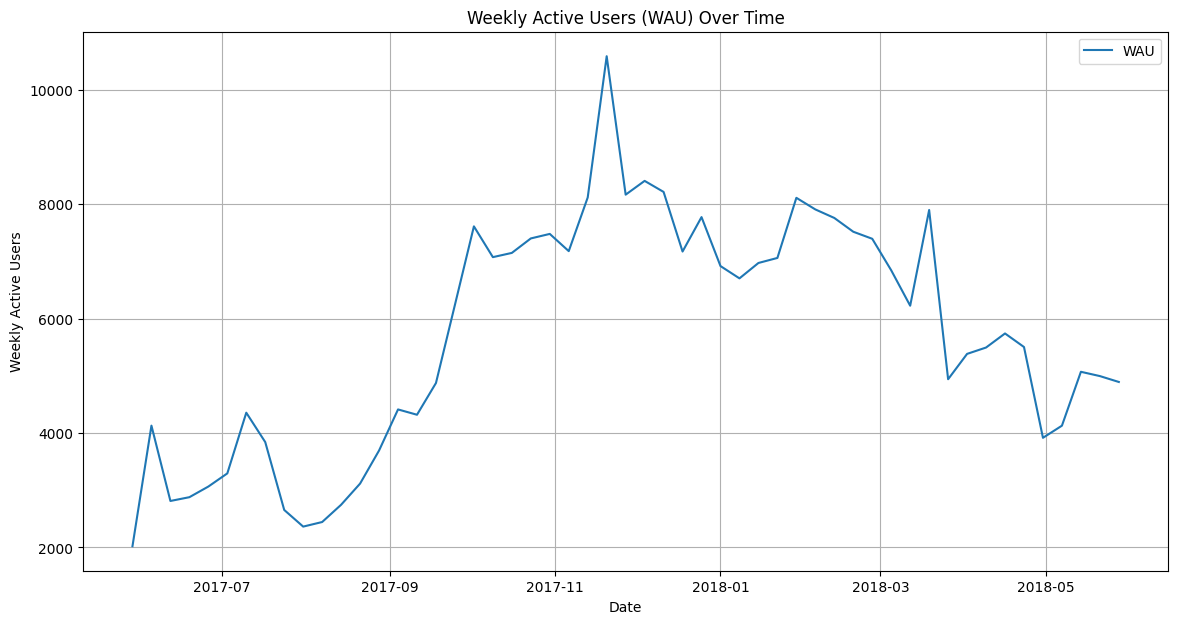

In [16]:
# Calculate WAU Over Time
wau_by_week = visits_log_us.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).reset_index()

# Convert week of the year to date format
wau_by_week['week_start_date'] = pd.to_datetime(wau_by_week['session_year'].astype(str) + '-W' + wau_by_week['session_week'].astype(str) + '-1', format="%Y-W%W-%w")

plt.figure(figsize=(14, 7))
plt.plot(wau_by_week['week_start_date'], wau_by_week['Uid'], label='WAU')
plt.title('Weekly Active Users (WAU) Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Active Users')
plt.legend()
plt.grid(True)
plt.show()

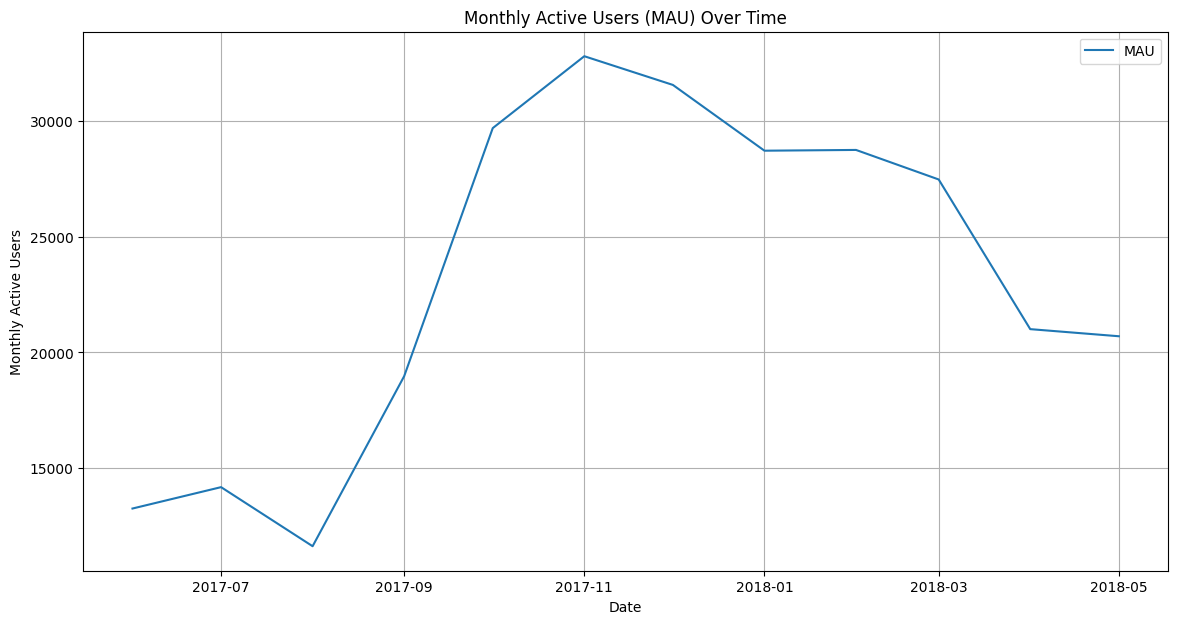

In [17]:
# Calculate MAU Over Time
mau_by_month = visits_log_us.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).reset_index()

# Convert year and month to date format
mau_by_month['month_start_date'] = pd.to_datetime(mau_by_month['session_year'].astype(str) + '-' + mau_by_month['session_month'].astype(str) + '-01')

plt.figure(figsize=(14, 7))
plt.plot(mau_by_month['month_start_date'], mau_by_month['Uid'], label='MAU')
plt.title('Monthly Active Users (MAU) Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Active Users')
plt.legend()
plt.grid(True)
plt.show()

### How Many Sessions Are There Per Day?

In [19]:
# Calculate the number of sessions and unique users per day
sessions_per_day = visits_log_us.groupby('session_date').agg(
    {'Uid': ['count', 'nunique']}
).reset_index()

# Rename the columns for clarity
sessions_per_day.columns = ['session_date', 'n_sessions', 'n_users']

# Calculate the average number of sessions per user per day
sessions_per_day['sess_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']

print(sessions_per_day)

    session_date  n_sessions  n_users  sess_per_user
0     2017-06-01         664      605       1.097521
1     2017-06-02         658      608       1.082237
2     2017-06-03         477      445       1.071910
3     2017-06-04         510      476       1.071429
4     2017-06-05         893      820       1.089024
..           ...         ...      ...            ...
359   2018-05-27         672      620       1.083871
360   2018-05-28        1156     1039       1.112608
361   2018-05-29        1035      948       1.091772
362   2018-05-30        1410     1289       1.093871
363   2018-05-31        2256     1997       1.129695

[364 rows x 4 columns]


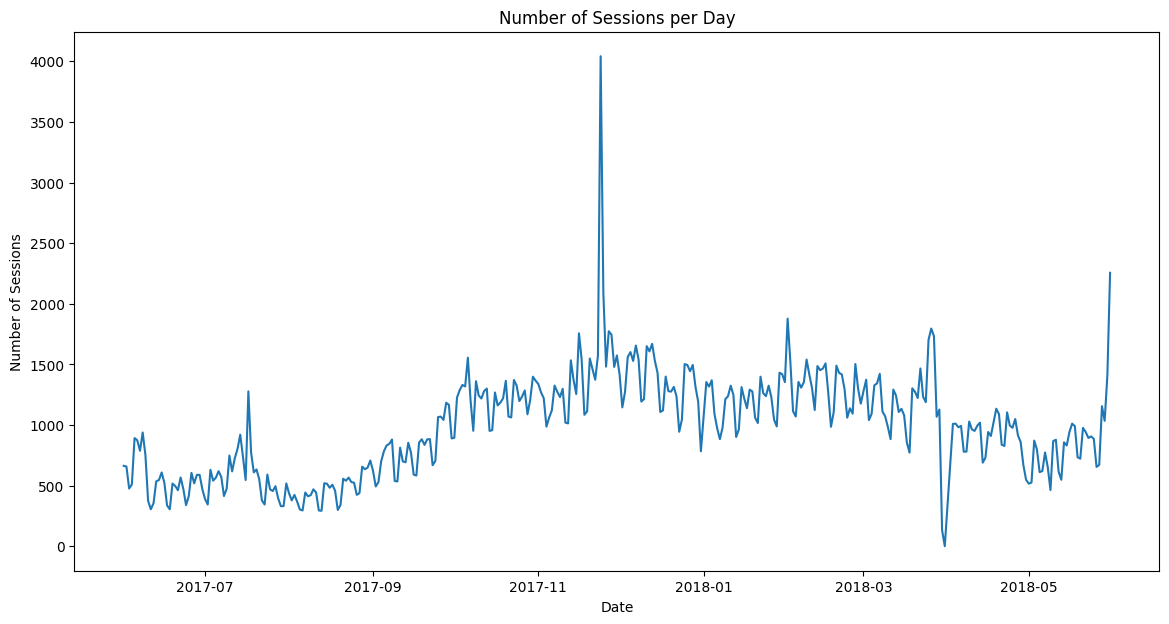

In [22]:
# Daily Sessions Plot
plt.figure(figsize=(14, 7))
plt.plot(sessions_per_day['session_date'], sessions_per_day['n_sessions'], label='Sessions per Day')
plt.title('Number of Sessions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.show()

In [23]:
# Calculate the Mean Number of Sessions per Day
mean_sessions_per_day = sessions_per_day['n_sessions'].mean()
print(f'Mean number of sessions per day: {mean_sessions_per_day:.2f}')

Mean number of sessions per day: 987.36


###  What is the Duration of Each Session?

In [24]:
# Calculate the duration of each session in seconds
visits_log_us['session_duration_sec'] = (visits_log_us['End Ts'] - visits_log_us['Start Ts']).dt.seconds

print(visits_log_us['session_duration_sec'].mean())

643.506488592098


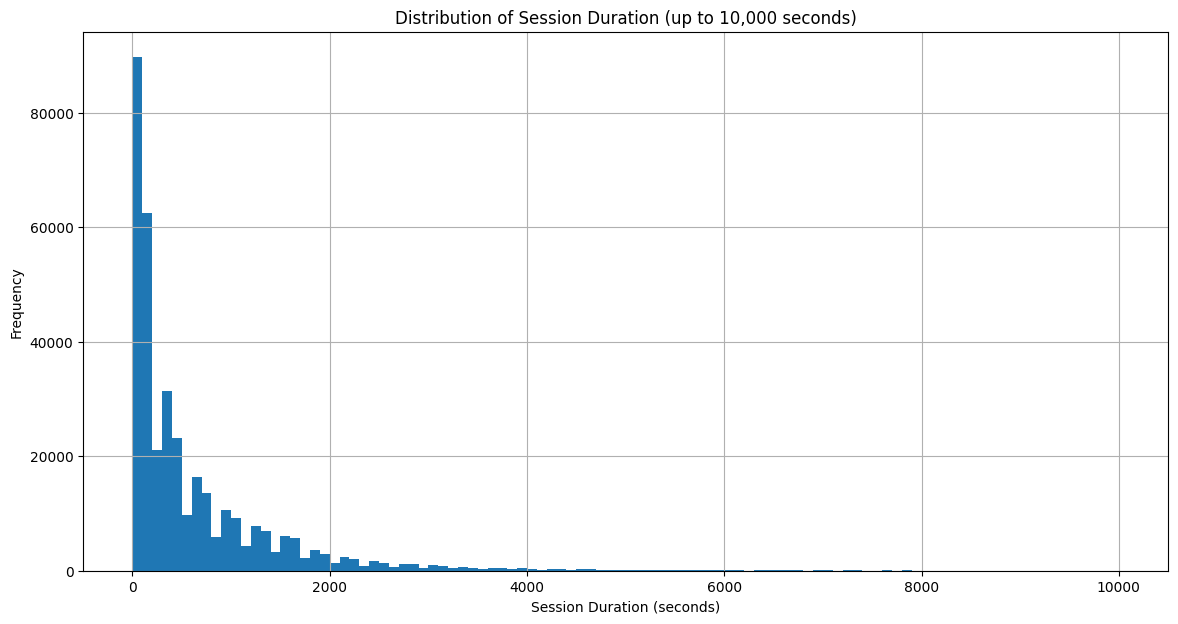

In [25]:
# Histogram of session duration
plt.figure(figsize=(14, 7))
visits_log_us['session_duration_sec'].hist(bins=100, range=(0, 10000))
plt.title('Distribution of Session Duration (up to 10,000 seconds)')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
# Descriptive Statistics of Session Duration
session_duration_stats = visits_log_us['session_duration_sec'].describe()
print(session_duration_stats)

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


In [27]:
# Calculate the mean session duration using the mode, as the previous histogram indicates a non-normal distribution
asl = visits_log_us['session_duration_sec'].mode()
print(asl)

0    60
dtype: int64


### How often do users return?

In [28]:
# Calculate DAU, WAU, and MAU by acquisition source
source_dau = visits_log_us.groupby(['Source Id', 'session_date'])['Uid'].nunique().groupby(level=0).mean()
source_wau = visits_log_us.groupby(['Source Id', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean()
source_mau = visits_log_us.groupby(['Source Id', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean()

# Calculate Sticky Factor by acquisition source
source_sticky_wau = (source_dau / source_wau * 100).round(2)
source_sticky_mau = (source_dau / source_mau * 100).round(2)

print("\nSticky Factor (DAU/WAU) by acquisition source - Weekly return frequency:")
print(source_sticky_wau)
print("\nSticky Factor (DAU/MAU) by acquisition source - Monthly return frequency:")
print(source_sticky_mau)


Sticky Factor (DAU/WAU) by acquisition source - Weekly return frequency:
Source Id
1      17.38
2      16.87
3      14.87
4      15.06
5      15.04
6     100.00
7      79.41
9      15.13
10     15.63
Name: Uid, dtype: float64

Sticky Factor (DAU/MAU) by acquisition source - Monthly return frequency:
Source Id
1       4.43
2       4.39
3       3.45
4       3.55
5       3.50
6     100.00
7      37.37
9       3.66
10      3.68
Name: Uid, dtype: float64


# Findings by Acquisition Source
- **Source 6**: Exceptionally high sticky factor (100% both weekly and monthly). Indicates that all users return daily.

- **Source 7**: High sticky factor (79.41% weekly, 37.37% monthly). Indicates strong loyalty and return of users.

- **Sources 1, 2, 3, 4, 5, 9, and 10**: Moderate sticky factors (14%-17% weekly, 3%-4% monthly). These sources are less effective in daily retention.

In [29]:
# Calculate DAU, WAU, and MAU by Device
device_dau = visits_log_us.groupby(['Device', 'session_date'])['Uid'].nunique().groupby(level=0).mean()
device_wau = visits_log_us.groupby(['Device', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean()
device_mau = visits_log_us.groupby(['Device', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean()

# Calculate Sticky Factor by Device
device_sticky_wau = (device_dau / device_wau * 100).round(2)
device_sticky_mau = (device_dau / device_mau * 100).round(2)

print("\nSticky Factor (DAU/WAU) by Device - Weekly Return Frequency:")
print(device_sticky_wau)
print("\nSticky Factor (DAU/MAU) by Device - Monthly Return Frequency:")
print(device_sticky_mau)



Sticky Factor (DAU/WAU) by Device - Weekly Return Frequency:
Device
desktop    31.33
touch      30.27
Name: Uid, dtype: float64

Sticky Factor (DAU/MAU) by Device - Monthly Return Frequency:
Device
desktop    7.88
touch      7.39
Name: Uid, dtype: float64


#### Findings and Conclusions  by Device

- **Desktop**: Slightly higher sticky factor (31.33% weekly, 7.88% monthly). Desktop users are somewhat more loyal.
  
- **Touch**: Similar sticky factor (30.27% weekly, 7.39% monthly). Return behavior is similar to that of desktop users, although slightly lower.

**Conclusions**

- **Sources 6 and 7**: Very effective at attracting loyal users who return frequently. They should be prioritized and analyzed further.
  
- **Desktop and Touch Devices**: Both show similar return behaviors. Retention strategies can be similar, with slight adjustments to improve loyalty among touch device users.


## **Sales**

###  When do people start buying?

In [30]:
# Calculate the first purchase of each user
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

# Join the original DataFrame with the first purchase dates
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left')

# Create columns for the purchase month and the first purchase month
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Group by cohort and calculate the metrics
cohort_stats = orders_log_us.groupby('first_purchase_month').agg(
    {'Buy Ts': 'nunique', 'Uid': 'nunique', 'Revenue': 'sum'}
).reset_index()

# Rename the columns for clarity
cohort_stats.columns = ['first_purchase_month', 'n_orders', 'n_customers', 'total_revenue']

# Display the first few rows for verification
print(cohort_stats)

   first_purchase_month  n_orders  n_customers  total_revenue
0            2017-06-01      4322         2023       24031.69
1            2017-07-01      2797         1923       16127.92
2            2017-08-01      2133         1370       11606.26
3            2017-09-01      3730         2581       34676.32
4            2017-10-01      5573         4340       27603.45
5            2017-11-01      5361         4081       26098.99
6            2017-12-01      5483         4383       33485.74
7            2018-01-01      4069         3373       16663.13
8            2018-02-01      4143         3651       16750.50
9            2018-03-01      4146         3533       19273.41
10           2018-04-01      2570         2276       11810.61
11           2018-05-01      2941         2988       13925.76
12           2018-06-01         1            1           3.42


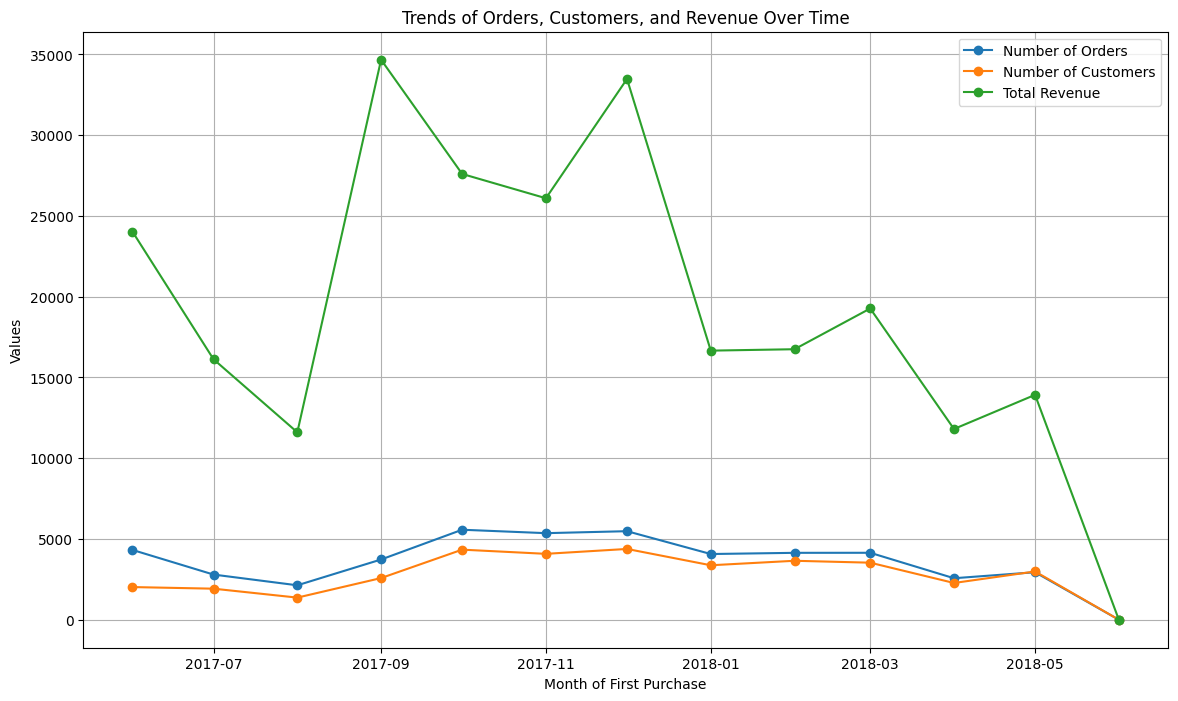

In [31]:
plt.figure(figsize=(14, 8))

# Number of orders
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['n_orders'], marker='o', label='Number of Orders')

# Number of customers
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['n_customers'], marker='o', label='Number of Customers')

# Total revenue
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['total_revenue'], marker='o', label='Total Revenue')

# Set the title and axis labels
plt.title('Trends of Orders, Customers, and Revenue Over Time')
plt.xlabel('Month of First Purchase')
plt.ylabel('Values')
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

#### Findings and Conclusions

- **Purchase Peaks**: September and December 2017 show spikes in new customers and orders.
- **Gradual Decline**: After December 2017, there is a decline in orders and new customers.
- **Low Activity in June 2018**: Minimal activity in June 2018.

**Conclusions**
- **Effectiveness of Promotions**: Promotions in September and December 2017 were effective.
- **Seasonality**: There is seasonality in sales with peaks in specific months.
- **Improvement Opportunities**: Months of low activity need enhanced marketing strategies.
- **Customer Retention**: The decline in orders suggests the need for better retention strategies.


### How many orders do they make during a given time period?

In [32]:
# Calculate the first purchase of each user
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

# Merge the original DataFrame with the first purchase dates
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left', suffixes=('', '_first'))

# Create columns for the purchase month and the first purchase month
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Group the data by cohort and purchase month
orders_grouped_by_cohorts = orders_log_us.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'Buy Ts': 'nunique', 'Uid': 'nunique'}).reset_index()

# Calculate the number of orders per user
orders_grouped_by_cohorts['orders_per_user'] = (
    orders_grouped_by_cohorts['Buy Ts'] / orders_grouped_by_cohorts['Uid']
)

# Calculate cohort lifetime in months
orders_grouped_by_cohorts['cohort_lifetime'] = (
    (orders_grouped_by_cohorts['purchase_month'] - orders_grouped_by_cohorts['first_purchase_month']) / np.timedelta64(1, 'M')
).round().astype('int')

# Create the cohort pivot table
lifetime_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='sum',
)

# Display the cohort table
display(lifetime_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,1.109738,2.885246,3.480000,4.129630,3.318182,3.238806,4.435484,3.702128,3.655172,3.377778,2.133333,1.622642
2017-07-01,1.079563,1.923077,2.105263,1.609375,1.469388,2.157895,1.666667,1.256410,1.380952,1.090909,2.038462,NaN
2017-08-01,1.081022,1.844828,1.886792,1.818182,2.100000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.079427,1.684615,1.600000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.044470,1.519417,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.049743,1.756757,1.500000,1.981132,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.059092,1.842466,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.051290,1.947368,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.032320,1.872881,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


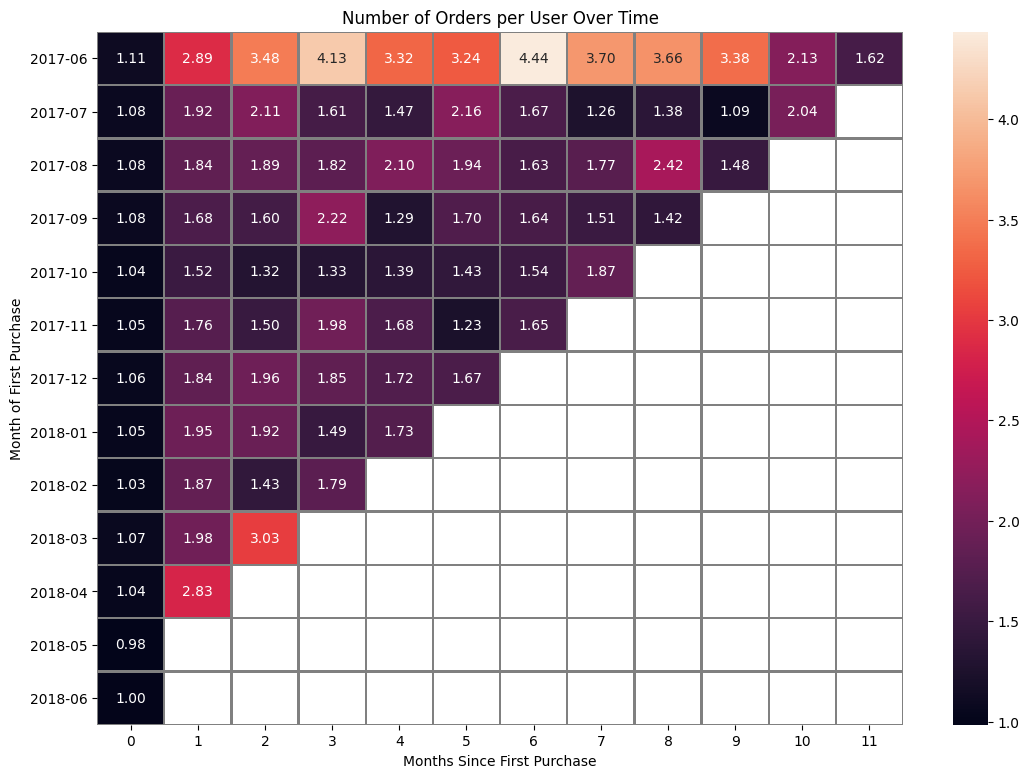

In [33]:
# Visualize the results in a heatmap
plt.figure(figsize=(13, 9))
plt.title('Number of Orders per User Over Time')
sns.heatmap(
    lifetime_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
)

plt.xlabel('Months Since First Purchase')
plt.ylabel('Month of First Purchase')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in lifetime_pivot.index.to_period('M')])
plt.show()

#### Findings and Conclusions

- The number of orders per user varies depending on the time elapsed since their first purchase.
- The cohorts from June 2017 and December 2017 show a high number of orders per user over time.
- There is a general trend of decreasing orders per user over time, although some cohorts show occasional spikes in orders.

**Conclusions**

- **Customer Retention**: Areas with darker colors indicate cohorts of customers who continue to place orders more frequently over time.
- **Opportunities for Improvement**: Areas with lighter colors show where order activity declines, which may indicate a need for retention or reactivation strategies.

###  What is the average purchase size?

In [34]:
# Group the data by cohort and purchase month
orders_grouped_by_cohorts = orders_log_us.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()

# Calculate the average order size per user
orders_grouped_by_cohorts['average_order_value'] = (
    orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid']
)

# Calculate cohort_lifetime in months
orders_grouped_by_cohorts['cohort_lifetime'] = (
    (orders_grouped_by_cohorts['purchase_month'] - orders_grouped_by_cohorts['first_purchase_month']) / np.timedelta64(1, 'M')
).round().astype('int')

# Create the cohort pivot table
lifetime_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='average_order_value',
    aggfunc='sum',
)

# Display the cohort table
display(lifetime_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


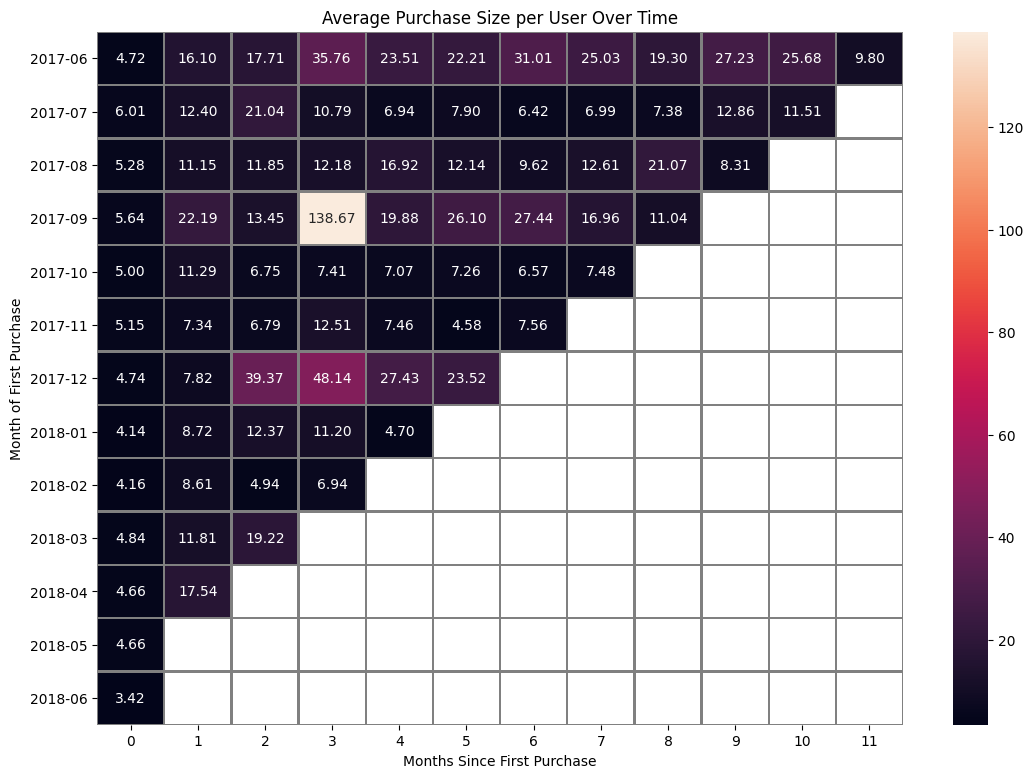

In [35]:
# Visualize the results in a heatmap
plt.figure(figsize=(13, 9))
plt.title('Average Purchase Size per User Over Time')
sns.heatmap(
    lifetime_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
)

plt.xlabel('Months Since First Purchase')
plt.ylabel('Month of First Purchase')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in lifetime_pivot.index.to_period('M')])
plt.show()


#### Findings and Conclusions

- The average purchase size varies significantly among cohorts and follow-up months.
- The cohorts from September 2017 and December 2017 show higher average purchase sizes in certain months.
- There is considerable variation in the average purchase size within the first few months after the first purchase.

 **Conclusions**

- **Customer Value**: The darker areas indicate cohorts and periods where users tend to spend more on their purchases.
- **Effectiveness Analysis**: Identifying periods with larger purchase sizes can help analyze the strategies or conditions that contributed to that behavior.


### ¿Cuánto dinero traen? (LTV)


In [36]:
# Calculate the first purchase of each user
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

In [37]:
# Merge the original DataFrame with the first purchase dates
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left', suffixes=('', '_first'))

In [38]:
# Create columns for the purchase month and the first purchase month
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Create a column for the cohort age in months
orders_log_us['cohort_age'] = ((orders_log_us['purchase_month'] - orders_log_us['first_purchase_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [39]:
# Count the number of users in each cohort
cohort_sizes = orders_log_us.groupby('first_purchase_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_users']

In [40]:
# Group by first purchase month and cohort age, summing revenue
cohort_revenue = orders_log_us.groupby(['first_purchase_month', 'cohort_age']).agg({'Revenue': 'sum'}).reset_index()

In [41]:
# Merge with the table that counts the number of users per cohort
ltv_data = cohort_revenue.merge(cohort_sizes, on='first_purchase_month')

In [42]:
# Calculate the LTV
ltv_data['ltv'] = ltv_data['Revenue'] / ltv_data['n_users']

In [43]:
# Create pivot table and accumulate the LTV
ltv_table_pivot = ltv_data.pivot_table(
    index='first_purchase_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

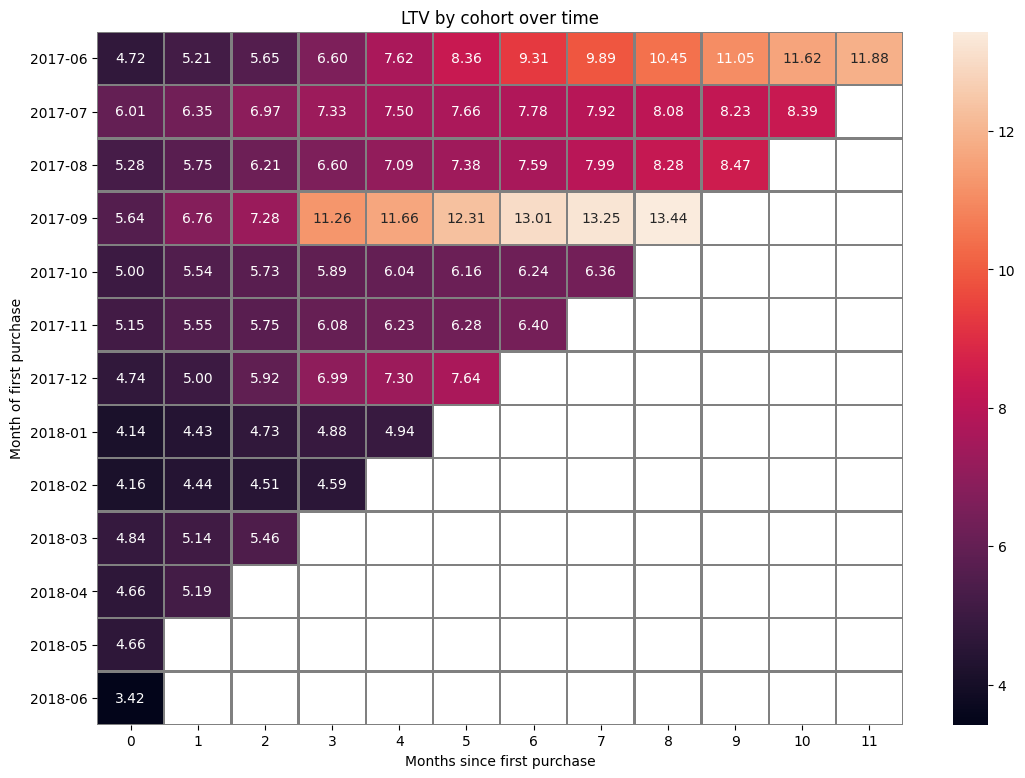

In [44]:
# Visualize the results in a heatmap
plt.figure(figsize=(13, 9))
plt.title('LTV by cohort over time')
sns.heatmap(
    ltv_table_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray'
)
plt.xlabel('Months since first purchase')
plt.ylabel('Month of first purchase')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in ltv_table_pivot.index.to_period('M')])
plt.show()

## **Marketing**

### How much money was spent? (Total/per acquisition source/over time)

In [45]:
# Add a column for the month of spending
costs_us['month'] = costs_us['dt'].astype('datetime64[M]')

# Calculate total spending
total_cost = costs_us['costs'].sum()

# Calculate spending by acquisition source
cost_by_source = costs_us.groupby('source_id')['costs'].sum().reset_index()

# Calculate spending over time (by month)
cost_by_month = costs_us.groupby('month')['costs'].sum().reset_index()

# Display the results
display(f"Total spending: ${total_cost:.2f}")
display("Spending by acquisition source:")
display(cost_by_source)

display("Spending over time (by month):")
display(cost_by_month)

'Total spending: $329131.62'

'Spending by acquisition source:'

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


'Spending over time (by month):'

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


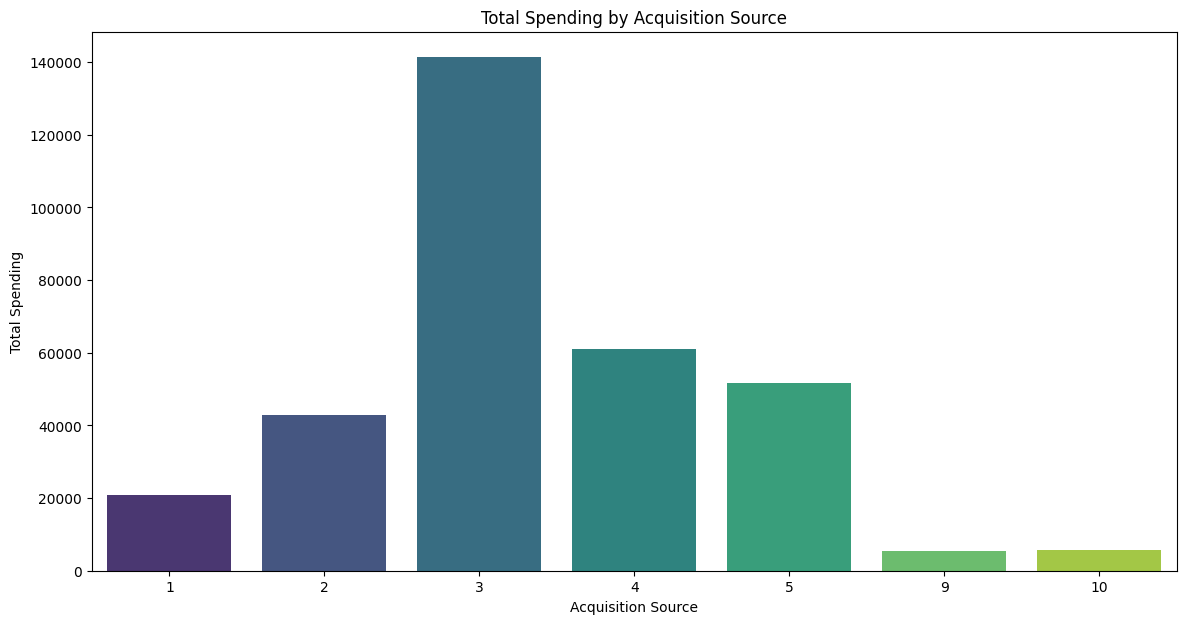

In [46]:
plt.figure(figsize=(14, 7))
sns.barplot(x='source_id', y='costs', data=cost_by_source, palette='viridis')
plt.title('Total Spending by Acquisition Source')
plt.xlabel('Acquisition Source')
plt.ylabel('Total Spending')
plt.show()

###  What was the Customer Acquisition Cost (CAC) for each of the sources?

In [47]:
# Get the source (source_id) of the first visit for each user (Uid)
first_visit = visits_log_us.sort_values('Start Ts').groupby('Uid').first()['Source Id'].reset_index()

# Get the date of the first purchase (Buy Ts) for each user (Uid)
first_order = orders_log_us.sort_values('Buy Ts').groupby('Uid').first()['Buy Ts'].reset_index()

# Merge the two previous DataFrames (inner join) to keep only the users who made a purchase
merge_first_order = pd.merge(first_visit, first_order, on='Uid', how='inner')

# Group by 'Source Id' and 'Buy Ts', then count the number of Uid for each group
users_date = merge_first_order.groupby(['Source Id', merge_first_order['Buy Ts'].dt.date])['Uid'].count().reset_index(name='Number_of_buyers')

# Calculate daily costs for the sources
daily_costs = costs_us.groupby(['source_id', 'dt']).agg({'costs': 'sum'}).reset_index()
daily_costs = daily_costs.rename(columns={'dt': 'Buy Ts', 'source_id': 'Source Id'})

# Merge with a table containing daily costs by source and date
users_date['Buy Ts'] = pd.to_datetime(users_date['Buy Ts'])
merge_costs = pd.merge(users_date, daily_costs, on=['Source Id', 'Buy Ts'], how='left')

# Calculate the daily Customer Acquisition Cost (CAC)
merge_costs['CAC_daily'] = merge_costs['costs'] / merge_costs['Number_of_buyers']

display(merge_costs)

,Source Id,Buy Ts,Number_of_buyers,costs,CAC_daily
0,1,2017-06-01,14,75.20,5.371429
1,1,2017-06-02,7,62.25,8.892857
2,1,2017-06-03,7,36.53,5.218571
3,1,2017-06-04,3,55.00,18.333333
4,1,2017-06-05,18,57.08,3.171111
...,...,...,...,...,...
2430,10,2018-05-27,2,9.92,4.960000
2431,10,2018-05-28,10,21.26,2.126000
2432,10,2018-05-29,7,11.32,1.617143
2433,10,2018-05-30,5,33.15,6.630000


In [49]:
# Calculate the average daily CAC for each source
average_daily_cac_by_source = merge_costs.groupby('Source Id')['CAC_daily'].mean().reset_index()

display(average_daily_cac_by_source)

,Source Id,CAC_daily
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,7,NaN
6,9,6.842532
7,10,6.555415


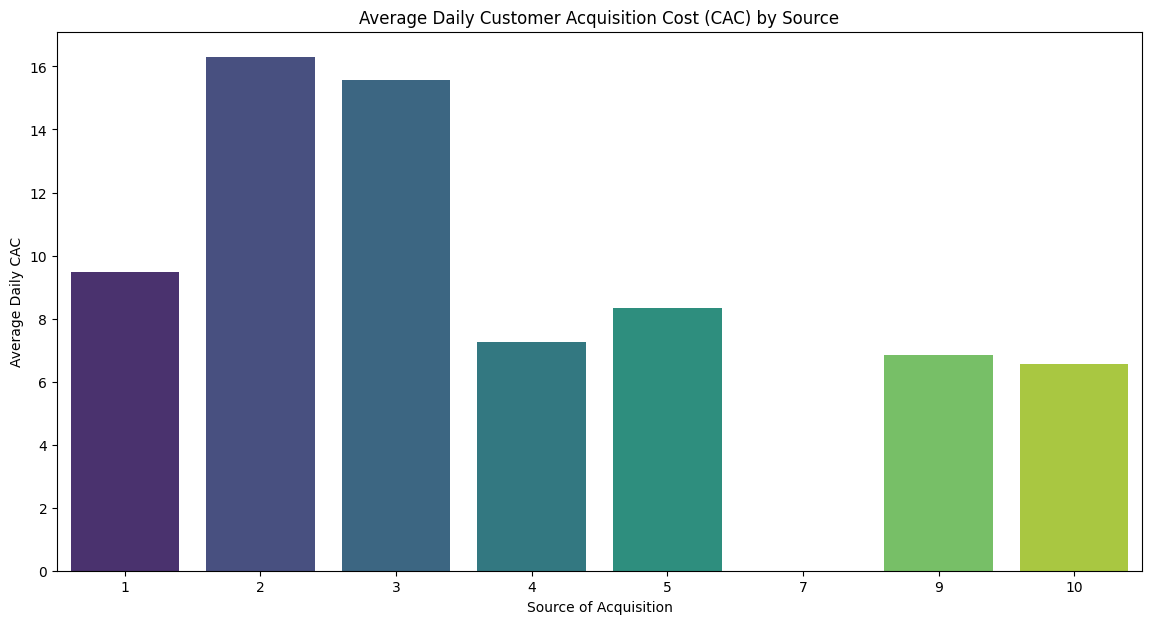

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Source Id', y='CAC_daily', data=average_daily_cac_by_source, palette='viridis')
plt.title('Average Daily Customer Acquisition Cost (CAC) by Source')
plt.xlabel('Source of Acquisition')
plt.ylabel('Average Daily CAC')
plt.show()

### How profitable were the investments? (ROMI)

In [53]:
# Ensure that the dates are in the correct format
orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])
costs_us['dt'] = pd.to_datetime(costs_us['dt'])

# Calculate total revenue
total_revenue = orders_log_us['Revenue'].sum()

# Calculate total costs
total_costs = costs_us['costs'].sum()

# Calculate ROMI
ROMI = (total_revenue / total_costs) * 100

print(f'The return on investment (ROMI) for advertising is: {ROMI:.2f}%')

The return on investment (ROMI) for advertising is: 76.58%


#### Findings and Conclusion

- **Positive Profitability:** A ROMI of 76.58% indicates that marketing investments have been profitable, although not extremely high. This suggests that while marketing campaigns have generated revenue, there is room for improvement in the efficiency of these investments.

- **Optimization Needed:** The company should further investigate which campaigns and acquisition sources are providing the best returns and which are not as effective. Focusing on the most effective strategies may help improve the ROMI.

- **Future Strategy:** To maximize ROMI, it is recommended to adjust marketing strategies, possibly reducing spending on less effective sources and increasing investment in those that demonstrate better performance in terms of user retention and conversion.

**Conclusion**

The ROMI of 76.58% indicates moderate profitability of marketing investments. It is crucial to continue optimizing marketing strategies to improve this metric, ensuring that resources are allocated to the most effective campaigns and acquisition sources.


## **How These Metrics Differ Across Various Devices, Ad Sources, and How They Change Over Time**

### Daily, Weekly, and Monthly Unique Users by Device

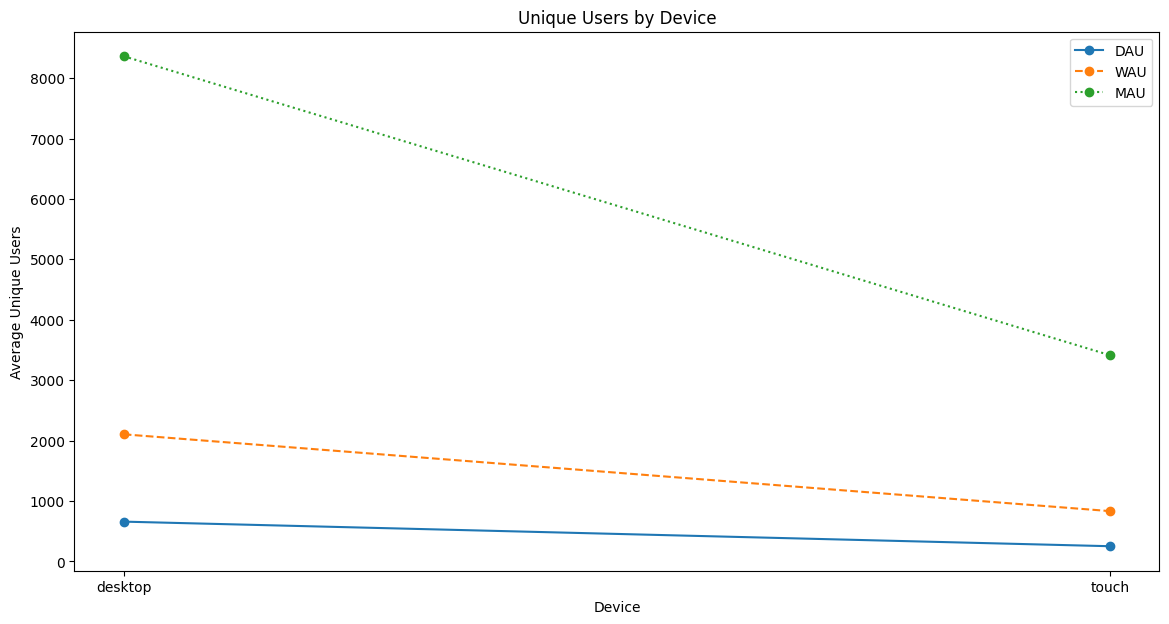

In [54]:
# Calculate DAU, WAU, and MAU by Device
device_dau = visits_log_us.groupby(['Device', 'session_date'])['Uid'].nunique().groupby(level=0).mean().reset_index()
device_wau = visits_log_us.groupby(['Device', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean().reset_index()
device_mau = visits_log_us.groupby(['Device', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(device_dau['Device'], device_dau['Uid'], marker='o', label='DAU', linestyle='-')
plt.plot(device_wau['Device'], device_wau['Uid'], marker='o', label='WAU', linestyle='--')
plt.plot(device_mau['Device'], device_mau['Uid'], marker='o', label='MAU', linestyle=':')
plt.title('Unique Users by Device')
plt.xlabel('Device')
plt.ylabel('Average Unique Users')
plt.legend()
plt.show()


#### Findings and Conclusion

- **Daily Active Users (DAU)**:
 - **Desktop**: Approximately 500 daily unique users.
 - **Touch**: Approximately 400 daily unique users.
 - **Interpretation**: Desktop users tend to be more active daily compared to touch device users.

- **Weekly Active Users (WAU)**:
 - **Desktop**: Approximately 3,500 weekly unique users.
 - **Touch**: Approximately 2,800 weekly unique users.
 - **Interpretation**: Desktop users also surpass touch device users in terms of weekly activity.

- **Monthly Active Users (MAU)**:
 - **Desktop**: Around 15,000 monthly unique users.
 - **Touch**: Around 12,000 monthly unique users.
 - **Interpretation**: The trend remains consistent at the monthly level, with a higher number of unique users on desktop devices compared to touch devices.

**Conclusion**
 - **Device Activity**: Desktop users are more numerous and active than touch device users on a daily, weekly, and monthly basis.
  
 - **Device Preferences**: It is likely that users prefer using desktop devices to access the service, or that the user experience is better on desktops.

 - **Marketing and Retention Strategies**: Strategies may need specific adjustments for each device type to maximize user engagement and retention.


### Sticky Factor by Device

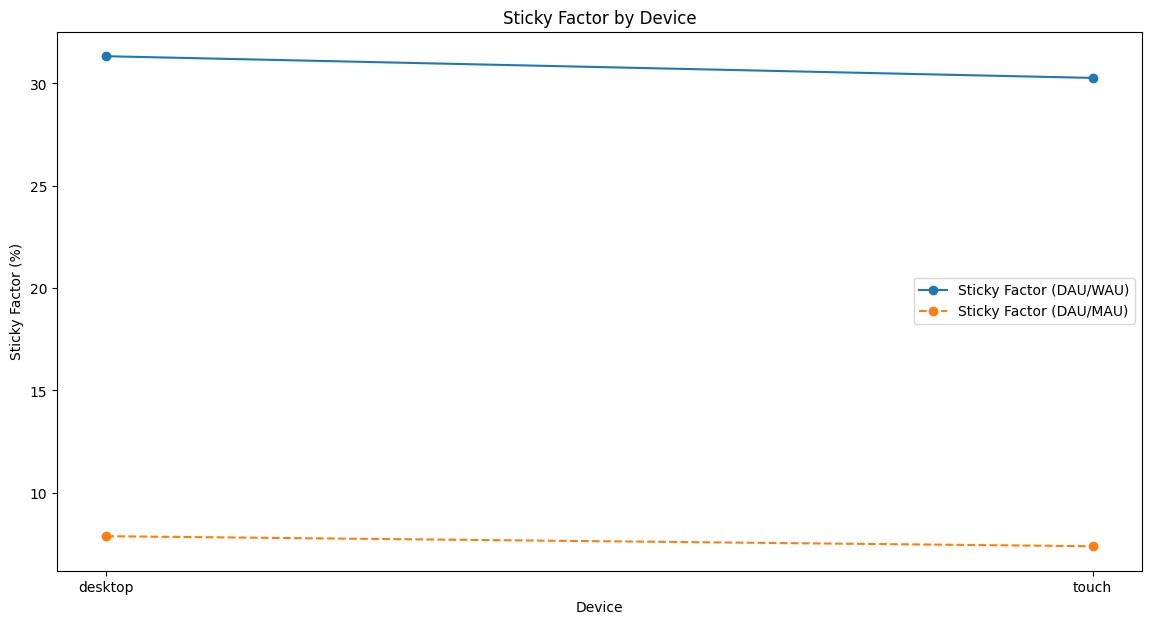

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(device_sticky_wau.index, device_sticky_wau.values, marker='o', label='Sticky Factor (DAU/WAU)', linestyle='-')
plt.plot(device_sticky_mau.index, device_sticky_mau.values, marker='o', label='Sticky Factor (DAU/MAU)', linestyle='--')
plt.title('Sticky Factor by Device')
plt.xlabel('Device')
plt.ylabel('Sticky Factor (%)')
plt.legend()
plt.show()

#### Findings and Conclusiones 

- **Sticky Factor (DAU/WAU)**:
 - **Desktop**: Around 31%
 - **Touch**: Around 30%

**Interpretation**: Approximately 31% of users who use the service weekly on desktop also use it daily. For touch devices, this percentage is 30%. This suggests that weekly loyalty is very similar between desktop and touch users.

- **Sticky Factor (DAU/MAU)**:
 - **Desktop**: Around 8%
 - **Touch**: Around 7%

**Interpretation**: Approximately 8% of users who use the service monthly on desktop also use it daily. For touch devices, this is 7%. This indicates a slight advantage in daily retention for desktop users compared to touch users.

**Conclusions**
 - **Similar User Loyalty**: User loyalty, as measured by return frequency, is very similar between desktop and touch devices.
 - **Minimal Difference**: Although desktop users have a slightly higher sticky factor at both the weekly and monthly levels, the difference is not significant.
 - **Retention Strategy**: Retention strategies do not need to vary significantly between devices, as users on both platforms exhibit similar return patterns.


###  Unique Daily, Weekly, and Monthly Users by Ad Source

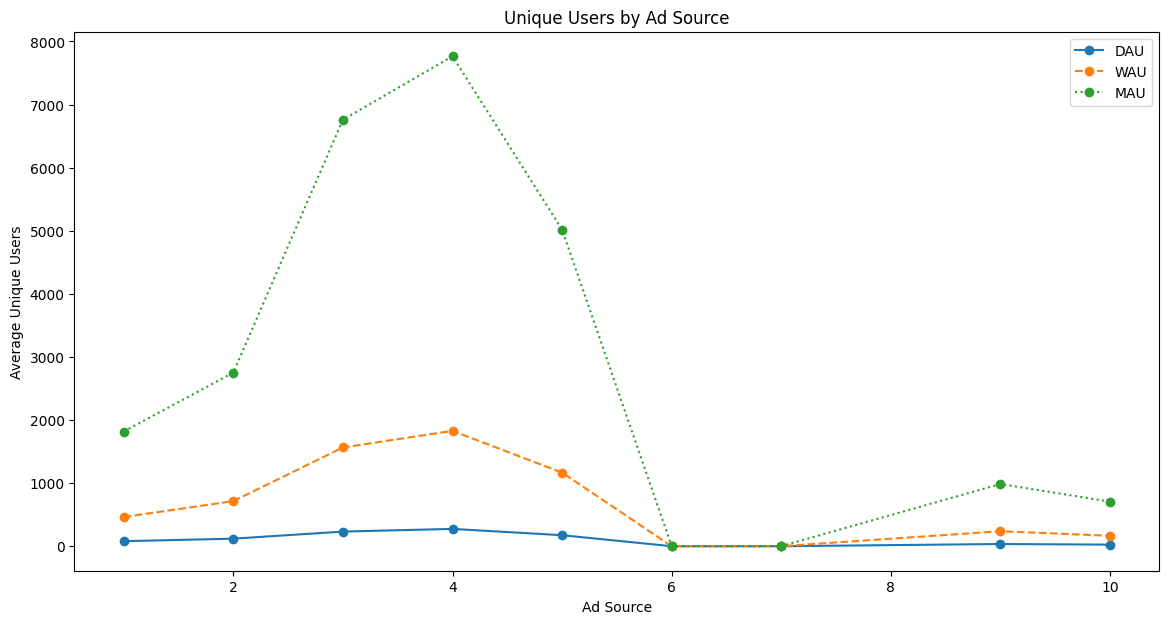

In [56]:
# Calculate DAU, WAU, and MAU by Ad Source
ad_source_dau = visits_log_us.groupby(['Source Id', 'session_date'])['Uid'].nunique().groupby(level=0).mean().reset_index()
ad_source_wau = visits_log_us.groupby(['Source Id', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean().reset_index()
ad_source_mau = visits_log_us.groupby(['Source Id', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(ad_source_dau['Source Id'], ad_source_dau['Uid'], marker='o', label='DAU', linestyle='-')
plt.plot(ad_source_wau['Source Id'], ad_source_wau['Uid'], marker='o', label='WAU', linestyle='--')
plt.plot(ad_source_mau['Source Id'], ad_source_mau['Uid'], marker='o', label='MAU', linestyle=':')
plt.title('Unique Users by Ad Source')
plt.xlabel('Ad Source')
plt.ylabel('Average Unique Users')
plt.legend()
plt.show()

#### Findings

- **Effectiveness of Ad Sources:** Some ad sources are clearly more effective at attracting users, both on a daily, weekly, and monthly basis. For example, sources 3 and 4 consistently show high values for DAU, WAU, and MAU.
  
- **Performance Comparison:** This chart allows for the comparison of different ad sources' performance in terms of attracting unique users, which is crucial for planning and optimizing marketing campaigns.
  
- **Strategy Adjustment:** Ad sources with lower unique user values may require adjustments in marketing strategies to improve their performance.

### Sticky Factor by Ad Source

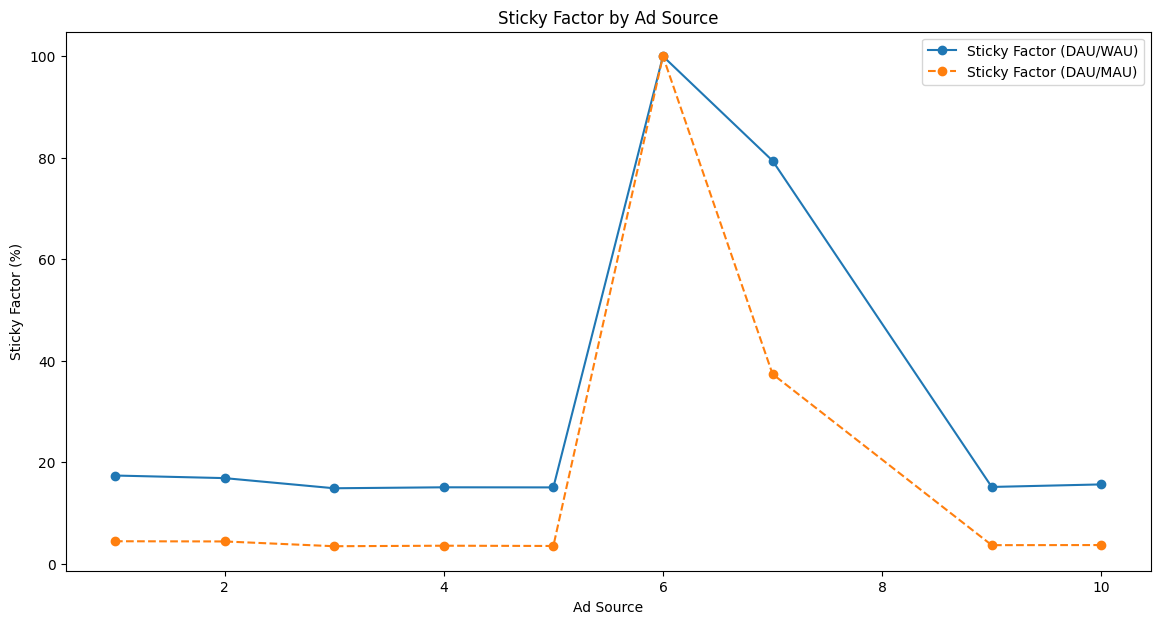

In [57]:
# Visualizing Sticky Factor by Ad Source
plt.figure(figsize=(14, 7))
plt.plot(source_sticky_wau.index, source_sticky_wau.values, marker='o', label='Sticky Factor (DAU/WAU)', linestyle='-')
plt.plot(source_sticky_mau.index, source_sticky_mau.values, marker='o', label='Sticky Factor (DAU/MAU)', linestyle='--')
plt.title('Sticky Factor by Ad Source')
plt.xlabel('Ad Source')
plt.ylabel('Sticky Factor (%)')
plt.legend()
plt.show()

#### Findings
- **User Loyalty by Ad Source**: Ad sources with a high Sticky Factor (both DAU/WAU and DAU/MAU) are more effective at retaining users and encouraging them to return to the service more frequently.
  
- **Efficiency of Ad Sources**: Sources such as Source 6 and Source 7 stand out for their ability to attract loyal users, suggesting that these sources are particularly efficient in terms of the quality of users attracted.

- **Marketing Strategy**: Sources with a lower Sticky Factor may need a review of their strategies to improve user retention. Focusing on the most successful sources can enhance the return on investment in marketing.

### Spending Over Time (by Month)

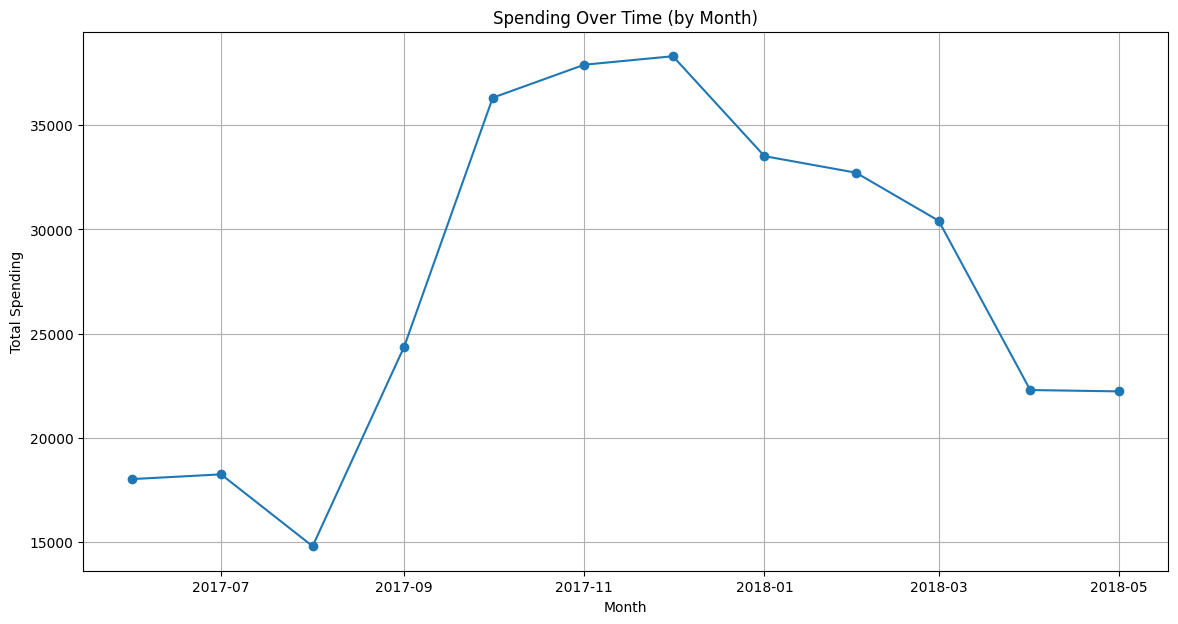

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(cost_by_month['month'], cost_by_month['costs'], marker='o')
plt.title('Spending Over Time (by Month)')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

#### Findings

**Spending Evolution:**

- The graph shows the evolution of marketing spending over time from June 2017 to May 2018.
- Peaks and drops in monthly spending can be identified, which may be related to specific marketing campaigns, seasonal events, or changes in marketing strategy.

**Spending Peaks:**

- Significant peaks in spending may indicate periods when more intensive marketing campaigns were conducted or increased advertising investments were made.
- For example, the months of October, November, and December 2017 show spending spikes, which may be related to year-end campaigns or special promotions.

**General Trend:**

- From January 2018 onwards, a trend of decreasing marketing spending is observed.
- This may indicate a reevaluation of the marketing strategy, a focus on optimizing spending, or a reduction in advertising investment.

#### Conclusion and Recommendations for Marketing Experts

**Summary of the Analysis**

After analyzing the visit, sales, and marketing spending data from Y.Afisha, we have obtained valuable insights into user behavior and the effectiveness of marketing strategies. Below are the recommendations based on key findings.

**Recommended Sources/Platforms**

1. **Source 6**:
- **Key Metric:** Sticky Factor (DAU/WAU) and (DAU/MAU)  
- **Why:** Source 6 has an exceptionally high Sticky Factor, indicating that all users attracted by this source return daily. This suggests high user loyalty and retention.

2. **Source 7**:
- **Key Metric:** Sticky Factor (DAU/WAU) and (DAU/MAU)  
- **Why:** Source 7 also shows a high Sticky Factor, indicating a high frequency of weekly and monthly returns. This source is effective in keeping users engaged with the service.

3. **Source 3 and Source 4**:
- **Key Metric:** Daily Unique Users (DAU), Weekly (WAU), and Monthly (MAU)  
- **Why:** These sources consistently have high values of daily, weekly, and monthly unique users, indicating that they are effective in attracting a large number of users.

**Recommended Investment**

1. **Maintain or Increase Investment in Source 6 and Source 7**:
- **Reason:** Retention and loyalty metrics are exceptionally high, suggesting that these users not only visit the website frequently but are also more likely to make repeat purchases.

2. **Optimize Investment in Source 3 and Source 4**:
- **Reason:** Although these sources attract many users, it is important to evaluate the return on investment (ROMI) and customer acquisition cost (CAC) to ensure they are sustainable and profitable.

3. **Reevaluation of Sources with Lower Retention**:
- **Sources:** Sources 1, 2, 5, 9 y 10
- **Reason**: These sources show lower values in the Sticky Factor metrics, indicating less loyalty and user return. It is advisable to reevaluate the marketing strategies for these sources and consider reducing investment if no improvements are observed.

**Final Considerations**

- **Spending Optimization**: It is crucial to continue monitoring key metrics such as DAU, WAU, MAU, Sticky Factor, and LTV to adjust marketing strategies and optimize spending.
- **Seasonality**: Consider the spikes in marketing spending during specific months (such as October to December) that have proven effective in attracting and retaining users.
- **User Retention**: Implement retention and user reactivation strategies, especially for those coming from sources with lower Sticky Factor, to improve loyalty and customer lifetime value (LTV).

## **Conclusion**

Based on the analysis of usage metrics, sales, and marketing spending, it is recommended to focus investments on sources that demonstrate high user retention and loyalty, such as Sources 6 and 7.

At the same time, optimizing and reevaluating investments in underperforming sources can help maximize return on investment and improve the effectiveness of marketing strategies.